**Mental health treatment predictor using data mining.**


* This project is mainly involves usage of data Mining techniques to predict if a emplyee working in the tech industry would need mental health treatment or not.
* Classified whether or not an employee needed treatment based on the mental health in tech survey data
*  Preprocessed and cleaned the obtained data in order to apply classification algorithms.
*  Implemented variety of machine learning classification algorithms like Logistic Regression,Random forest,Support
vector machine,Decision tree,K nearest neighbour,Recurrent neural network,Adaboost



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
pd.set_option('display.max_rows', None)
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
import math

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('gdrive/My Drive/DatSet_Final.csv')

In [ ]:
df.shape

(1259, 27)

In [ ]:
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
print('There are {} samples and {} attributes in this dataset.'.format(df.shape[0], df.shape[1]))

There are 1259 samples and 27 attributes in this dataset.


In [ ]:
df['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

In [ ]:
df.describe(include='all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np


print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Number of instances = 1259
Number of attributes = 27
Number of missing values:
	Timestamp: 0
	Age: 0
	Gender: 0
	Country: 0
	state: 515
	self_employed: 18
	family_history: 0
	treatment: 0
	work_interfere: 264
	no_employees: 0
	remote_work: 0
	tech_company: 0
	benefits: 0
	care_options: 0
	wellness_program: 0
	seek_help: 0
	anonymity: 0
	leave: 0
	mental_health_consequence: 0
	phys_health_consequence: 0
	coworkers: 0
	supervisor: 0
	mental_health_interview: 0
	phys_health_interview: 0
	mental_vs_physical: 0
	obs_consequence: 0
	comments: 1095


In [ ]:
Num = 0
stringval = 'NaN'

# Create lists by data tpe
Numerical = ['Age']
Categorical = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']

for feature in df:
    if feature in Numerical:
        df[feature] = df[feature].fillna(Num)
    elif feature in Categorical:
        df[feature] = df[feature].fillna(stringval)
    else:
        print('Error: Feature %s not recognized.' % feature)
df.head(5)  

Error: Feature Timestamp not recognized.
Error: Feature state not recognized.
Error: Feature comments not recognized.


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
import numpy as np


print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Number of instances = 1259
Number of attributes = 27
Number of missing values:
	Timestamp: 0
	Age: 0
	Gender: 0
	Country: 0
	state: 515
	self_employed: 0
	family_history: 0
	treatment: 0
	work_interfere: 0
	no_employees: 0
	remote_work: 0
	tech_company: 0
	benefits: 0
	care_options: 0
	wellness_program: 0
	seek_help: 0
	anonymity: 0
	leave: 0
	mental_health_consequence: 0
	phys_health_consequence: 0
	coworkers: 0
	supervisor: 0
	mental_health_interview: 0
	phys_health_interview: 0
	mental_vs_physical: 0
	obs_consequence: 0
	comments: 1095


In [ ]:
df = df.drop('comments', axis=1)
df = df.drop('Timestamp', axis=1)

In [ ]:
print(df['Gender'].unique())


['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [ ]:
Male=['M','Male','male','m','Male-ish','maile','Male ','Man','Mail','Malr','Mal','msle']
Female=['Female','female','F','Woman','f','Femake','woman','Female ','femail']
LGBTQIA=['Trans-female','Cis Female','Male-ish','something kinda male?','Cis Male','Male (CIS)','queer/she/they','non-binary','All','Enby','fluid','Genderqueer',
          'Androgyne','Agender','cis-female/femme','Guy (-ish) ^_^','male leaning androgynous','Neuter','Female (trans)','queer',
 'Female (cis)','Cis Man','ostensibly male, unsure what that really means','Trans woman','cis male']
Garbageval=['Make','Nah','A little about you','p']

df=df.replace(to_replace=Male,
           value="Male")
df=df.replace(to_replace=Female,
           value="Female")
df=df.replace(to_replace=LGBTQIA,
           value="LGBTQIA")

df = df[~df['Gender'].isin(Garbageval)]


  
print(df['Gender'].unique())

['Female' 'Male' 'LGBTQIA']


In [ ]:
print(df['no_employees'].unique())

smallcomp=['1-5']
midsize=['6-25','26-100','100-500']
largesize=['500-1000','More than 1000']

df=df.replace(to_replace=smallcomp,
           value="Smallcomp")
df=df.replace(to_replace=midsize,
           value="Midsize")
df=df.replace(to_replace=largesize,
           value="Largesize")

print(df['no_employees'].unique())


['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
['Midsize' 'Largesize' 'Smallcomp']


In [ ]:
#print(df['Age'].unique())
garbage=[99999999999,-1726,-29,329]



df = df[~df['Age'].isin(garbage)]

# df.loc[(df.Age < 20),  'Age'] = 20

  
print(df['Age'].unique())
#df['Age']

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61 11 72]


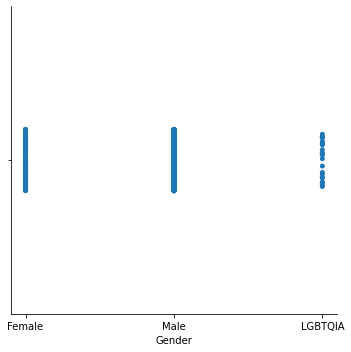

In [ ]:
male_count=df['Gender'].value_counts()['Male']
female_count=df['Gender'].value_counts()['Female']
LGBTQIA_count=df['Gender'].value_counts()['LGBTQIA']

plot=[male_count,female_count,LGBTQIA_count]


 
# print(list)
sns.catplot(data=df, x="Gender")
# count values in subjects column
#print(data['subjects'].value_counts()['php'])

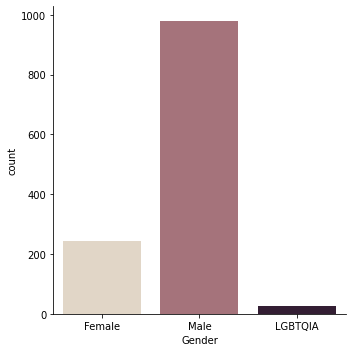

In [ ]:
sns.catplot(data=df, x="Gender", kind="count", palette="ch:.25")


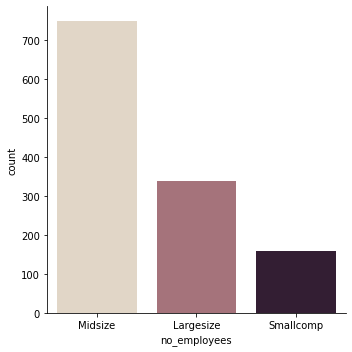

In [ ]:
sns.catplot(data=df, x="no_employees", kind="count", palette="ch:.25")


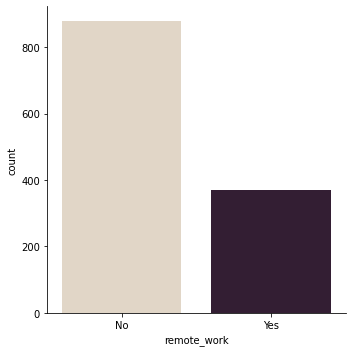

In [ ]:
sns.catplot(data=df, x="remote_work", kind="count", palette="ch:.25")


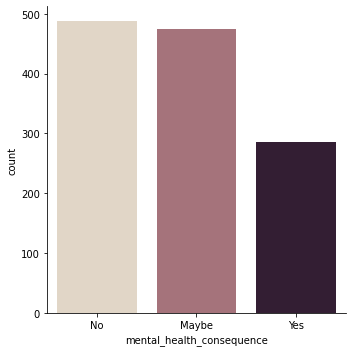

In [ ]:
sns.catplot(data=df, x="mental_health_consequence", kind="count", palette="ch:.25")


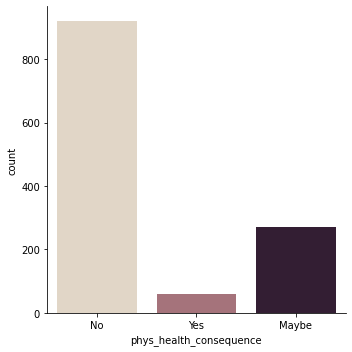

In [ ]:
sns.catplot(data=df, x="phys_health_consequence", kind="count", palette="ch:.25")


In [ ]:
df.loc[df["treatment"] == "Yes", "treatment"] = 1
df.loc[df["treatment"] == "No", "treatment"] = 0



In [ ]:
class_col=df['treatment']
data_new=df.drop('treatment',axis=1)

In [ ]:
ohe = pd.get_dummies(data=data_new, columns=data_new.columns)
ohe

,Age_5,Age_11,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,...,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0


In [ ]:
ohe['treatment']=class_col


In [ ]:
y=ohe['treatment']
X=ohe.drop(['treatment'],axis=1)

y=y.astype('int')


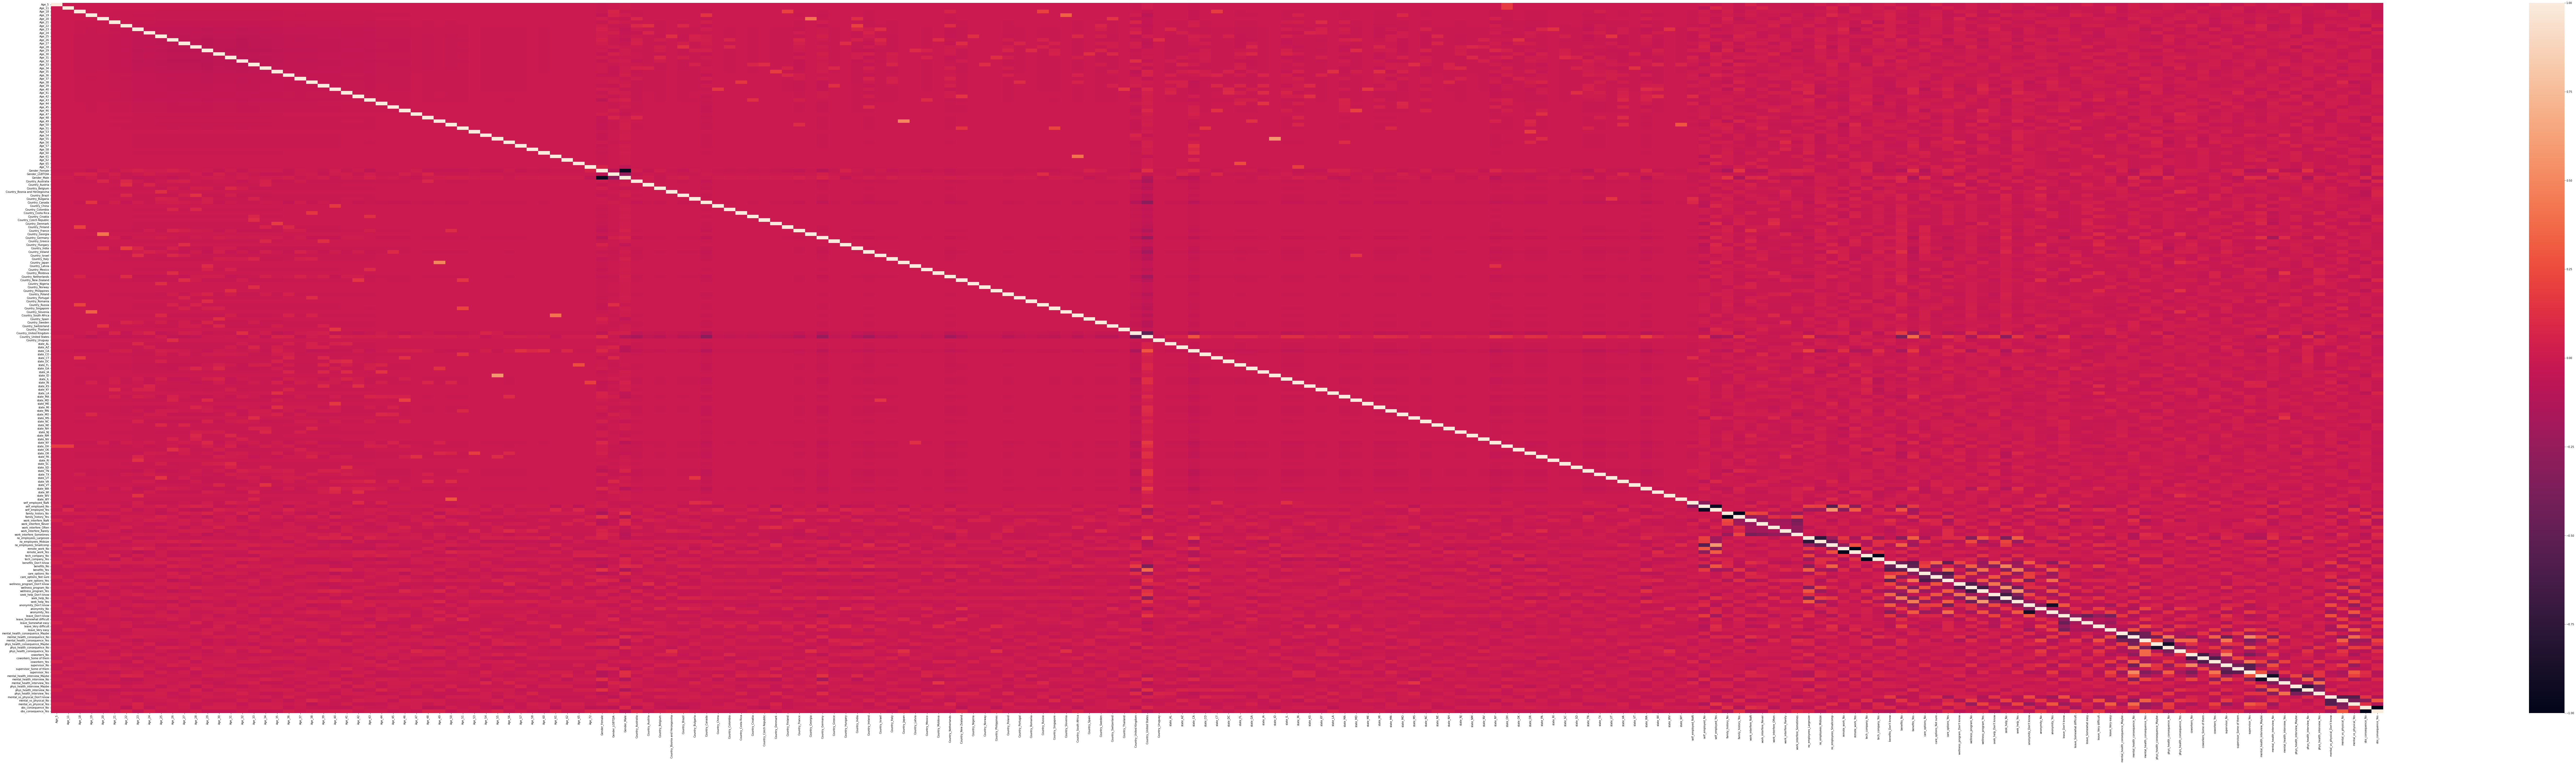

In [ ]:
corr = ohe.corr()



plt.figure(figsize=(200,50))
sns.heatmap(corr)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
clf_tree = tree.DecisionTreeClassifier(max_depth=8,criterion='gini',splitter='best',min_samples_split=4)
clf_tree = clf_tree.fit(X_train, y_train)

predY = clf_tree.predict(X_test)


print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predY)))

Accuracy on test data is 0.81


In [ ]:
print(classification_report(y_test, predY,target_names=['No Need of treatment', 'Need of treatment']))

                      precision    recall  f1-score   support

No Need of treatment       0.83      0.74      0.79       180
   Need of treatment       0.79      0.86      0.82       195

            accuracy                           0.81       375
           macro avg       0.81      0.80      0.80       375
        weighted avg       0.81      0.81      0.80       375



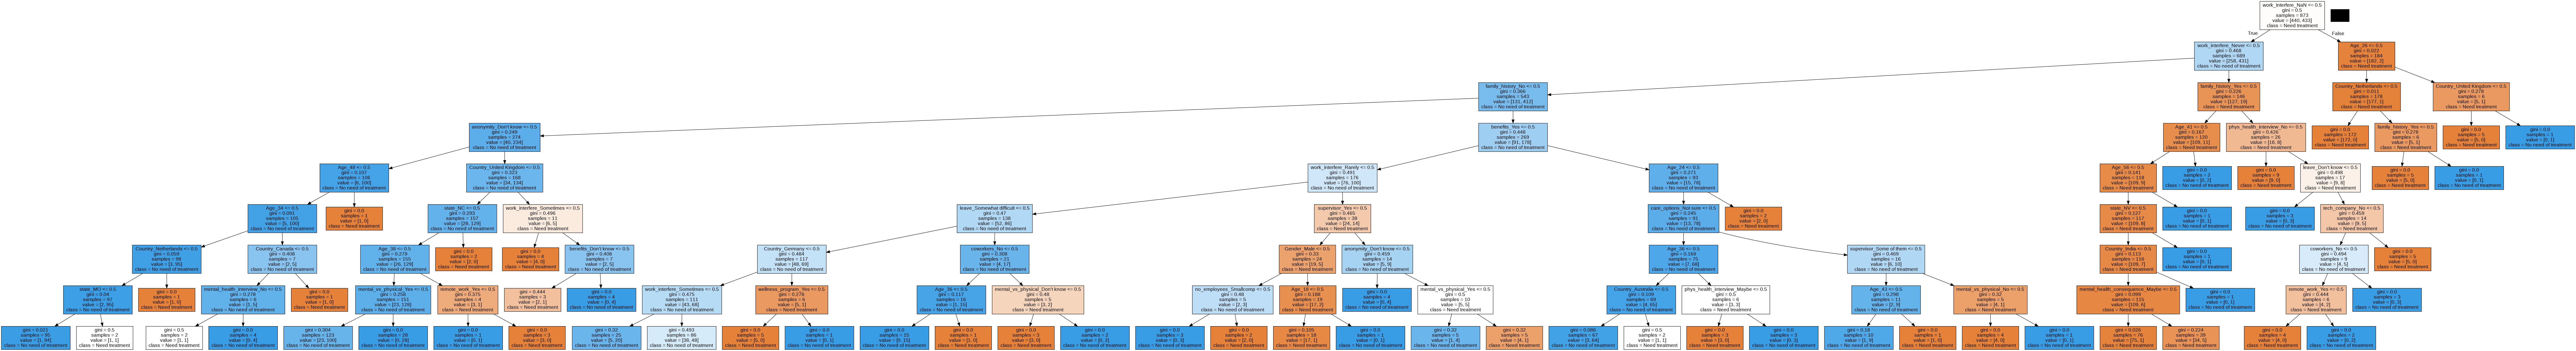

In [ ]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf_tree, feature_names=X.columns, class_names=['Need treatment','No need of treatment'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

Naive bayes

In [ ]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)

In [ ]:
y_pred_gnb = gnb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_gnb,target_names=['No Need of treatment', 'Need of treatment']))

                      precision    recall  f1-score   support

No Need of treatment       0.81      0.32      0.46       180
   Need of treatment       0.60      0.93      0.73       195

            accuracy                           0.64       375
           macro avg       0.70      0.63      0.59       375
        weighted avg       0.70      0.64      0.60       375



SVM

In [ ]:
for c in [0.1,1,10,100]:
  svc=SVC(kernel='rbf',C=c)
  svc.fit(X_train, y_train)
  y_pred_val_svm=svc.predict(X_test)
  print(f"Accuracy of model with kernal:RBF C={c} on test set: {accuracy_score(y_test,y_pred_val_svm)}")

svc=SVC(kernel='rbf',C=1)
svc.fit(X_train, y_train)
y_pred_val_svm=svc.predict(X_test)

Accuracy of model with kernal:RBF C=0.1 on test set: 0.8
Accuracy of model with kernal:RBF C=1 on test set: 0.8426666666666667
Accuracy of model with kernal:RBF C=10 on test set: 0.792
Accuracy of model with kernal:RBF C=100 on test set: 0.792


In [ ]:
print(classification_report(y_test, y_pred_val_svm,target_names=['No Need of treatment', 'Need of treatment']))

                      precision    recall  f1-score   support

No Need of treatment       0.91      0.74      0.82       180
   Need of treatment       0.80      0.93      0.86       195

            accuracy                           0.84       375
           macro avg       0.85      0.84      0.84       375
        weighted avg       0.85      0.84      0.84       375



Logistic regression

In [ ]:
clf = LogisticRegression(random_state=0)
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred_lgr = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_lgr,target_names=['No Need of treatment', 'Need of treatment']))

                      precision    recall  f1-score   support

No Need of treatment       0.81      0.82      0.81       180
   Need of treatment       0.83      0.83      0.83       195

            accuracy                           0.82       375
           macro avg       0.82      0.82      0.82       375
        weighted avg       0.82      0.82      0.82       375



KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred_knn =  knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_knn,target_names=['No Need of treatment', 'Need of treatment']))

                      precision    recall  f1-score   support

No Need of treatment       0.69      0.80      0.74       180
   Need of treatment       0.78      0.67      0.72       195

            accuracy                           0.73       375
           macro avg       0.74      0.73      0.73       375
        weighted avg       0.74      0.73      0.73       375



In [ ]:
ensemble = VotingClassifier(estimators=[('gnb', gnb), ('clf', clf), ('knn', knn)], voting='soft')

ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('gnb', GaussianNB()),
                             ('clf', LogisticRegression(random_state=0)),
                             ('knn', KNeighborsClassifier(metric='euclidean'))],
                 voting='soft')

In [ ]:
y_pred_ens=ensemble.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_ens,target_names=['No Need of treatment', 'Need of treatment']))

                      precision    recall  f1-score   support

No Need of treatment       0.86      0.73      0.79       180
   Need of treatment       0.78      0.89      0.83       195

            accuracy                           0.81       375
           macro avg       0.82      0.81      0.81       375
        weighted avg       0.82      0.81      0.81       375



In [ ]:
for clf, label in zip([gnb, clf, knn, ensemble], ['Naive Bayes', 'Logistic Regression', 'k Nearest Neighbors','Ensemble']):
    score = accuracy_score(clf.predict(X_test), y_test)
    print("Accuracy: %0.2f [%s]" % (score, label))

Accuracy: 0.64 [Naive Bayes]
Accuracy: 0.82 [Logistic Regression]
Accuracy: 0.73 [k Nearest Neighbors]
Accuracy: 0.81 [Ensemble]


Adaboost

In [ ]:
ada = AdaBoostClassifier(n_estimators=50, random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [ ]:
y_pred_ada =  ada.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_ada,target_names=['No Need of treatment', 'Need of treatment']))

                      precision    recall  f1-score   support

No Need of treatment       0.82      0.80      0.81       180
   Need of treatment       0.82      0.84      0.83       195

            accuracy                           0.82       375
           macro avg       0.82      0.82      0.82       375
        weighted avg       0.82      0.82      0.82       375



PCA

In [ ]:
n_components = 10

pca = PCA(n_components=n_components).fit(X_train)

In [ ]:
for i in range(n_components):
    print('Percentage of variance explained by PC {}: {}'.format(i+1, pca.explained_variance_ratio_[i]))
    
print('Total variance explained by 10 PCs: {}'.format(np.sum(pca.explained_variance_ratio_)))

Percentage of variance explained by PC 1: 0.08081208510554985
Percentage of variance explained by PC 2: 0.07674244320582449
Percentage of variance explained by PC 3: 0.06720036690854853
Percentage of variance explained by PC 4: 0.04097891846420932
Percentage of variance explained by PC 5: 0.03843145907947648
Percentage of variance explained by PC 6: 0.03687735604735439
Percentage of variance explained by PC 7: 0.03443408736220483
Percentage of variance explained by PC 8: 0.031045876557589468
Percentage of variance explained by PC 9: 0.026268870556978883
Percentage of variance explained by PC 10: 0.02600073397795276
Total variance explained by 10 PCs: 0.45879219726568904


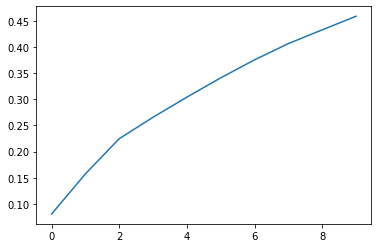

In [ ]:
sum_value=[sum(pca.explained_variance_ratio_[:i+1]) for i in range(n_components)]
import matplotlib.pyplot as graph
graph.plot(list(range(n_components)),sum_value)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.svm import SVC

C = 1
svc_clf = SVC(kernel='rbf', C=C)
svc_clf.fit(X_train_pca,y_train)

SVC(C=1)

In [ ]:
y_pred_pca = svc_clf.predict(X_test_pca)

In [ ]:
print(classification_report(y_test, y_pred_pca, target_names=['No Need of treatment', 'Need of treatment']))

                      precision    recall  f1-score   support

No Need of treatment       0.74      0.81      0.77       180
   Need of treatment       0.80      0.73      0.77       195

            accuracy                           0.77       375
           macro avg       0.77      0.77      0.77       375
        weighted avg       0.77      0.77      0.77       375



In [ ]:
import math
training_data_len = math.ceil(len(ohe) * .8 )


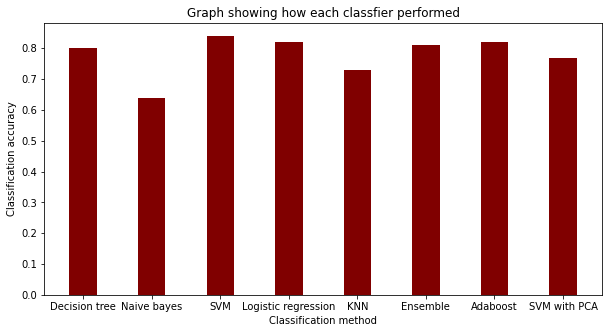

In [ ]:
data = {'Decision tree':0.8, 'Naive bayes':0.64, 'SVM':0.84,
        'Logistic regression':0.82,'KNN':0.73, 'Ensemble':0.81, 'Adaboost':0.82,
        'SVM with PCA':0.77}
classifier = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(classifier, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Classification method")
plt.ylabel("Classification accuracy")
plt.title("Graph showing how each classfier performed")
plt.show()

In [ ]:
# fig, ax = plt.subplots(1, 1)
# xaa=['a','b','c','d','e','f','g','h']
# accuracy_scores = [0.8,0.64,0.84,0.82,0.73,0.81,0.82,0.77]
# #plt.plot(x)
# ax.plot(accuracy_scores)
# ax.set_xlabel('Plot having Mean_minus1_std,Mean,Mean_plus1_std')

In [ ]:
param_grid = {'n_neighbors': list(range(1, 11)), 
              'weights': ['uniform', 'distance'],
              'metric': ['l1', 'l2', 'cosine']
             }

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

knn_clf = GridSearchCV(knn, param_grid)

knn_clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['l1', 'l2', 'cosine'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

In [ ]:
cv_results = pd.DataFrame(knn_clf.cv_results_)

#cv_results

In [ ]:
print(knn_clf.best_params_)

{'metric': 'cosine', 'n_neighbors': 8, 'weights': 'distance'}


In [ ]:
knn_final = KNeighborsClassifier(metric='cosine',n_neighbors=8,weights='distance')

In [ ]:
knn_final.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=8, weights='distance')

In [ ]:
y_pred_knn_para = knn_final.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_knn_para, target_names=['No Need of treatment', 'Need of treatment']))

                      precision    recall  f1-score   support

No Need of treatment       0.70      0.86      0.77       180
   Need of treatment       0.83      0.67      0.74       195

            accuracy                           0.76       375
           macro avg       0.77      0.76      0.76       375
        weighted avg       0.77      0.76      0.76       375



In [ ]:
param_grid = {'max_depth':range(3,20), 
              'criterion': ['gini','entropy'],
              'splitter':['best','random'],
              'min_samples_split':range(2,5)
             }
clf_tree_param = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, n_jobs=4)#Default CV is used which inicates 5 fold cross validation
clf_tree_param.fit(X=X_train, y=y_train)
tree_model = clf_tree_param.best_estimator_
print (clf_tree_param.best_score_, clf_tree_param.best_params_)

0.8258587848932677 {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'splitter': 'random'}


In [ ]:
clf_tree_new = tree.DecisionTreeClassifier(max_depth=3,criterion='gini',splitter='best',min_samples_split=2)
clf_tree_new = clf_tree_new.fit(X_train, y_train)

predY = clf_tree_new.predict(X_test)

In [ ]:
print(classification_report(y_test, predY, target_names=['No Need of treatment', 'Need of treatment']))

                      precision    recall  f1-score   support

No Need of treatment       0.91      0.74      0.82       180
   Need of treatment       0.79      0.93      0.86       195

            accuracy                           0.84       375
           macro avg       0.85      0.84      0.84       375
        weighted avg       0.85      0.84      0.84       375

